In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix

Reading the CSVs for results of sentimental analysis and tweet filtering

In [2]:
amazon = pd.read_csv('dataset/Sentiment_amazon_tweets2.csv')
tesla = pd.read_csv('dataset/Sentiment_tesla_tweets2.csv')
microsoft= pd.read_csv('dataset/Sentiment_microsoft_tweets2.csv')
google= pd.read_csv('dataset/Sentiment_google_tweets2.csv')
apple = pd.read_csv('dataset/Sentiment_apple_tweets2.csv')

Dropping columns which are not required for ML modeling

In [3]:
def drop_columns(df):
    df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
    df = df.drop(columns=['tweet_id','writer','body','comment_num','retweet_num','like_num','ticker_symbol','tidy_tweet'],axis=1)
    return df
    

In [4]:
tesla = drop_columns(tesla)
amazon = drop_columns(amazon)
microsoft = drop_columns(microsoft)
apple = drop_columns(apple)
google = drop_columns(google)

Using Linear Regression to predict Tesla stock prices

In [12]:
tesla_x = tesla.iloc[:, 1:5].values
tesla_y = tesla.iloc[:, 5].values

x_train, x_test, y_train, y_test = train_test_split(tesla_x, tesla_y, test_size=0.180,  shuffle= False)


scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

model = LinearRegression()
model.fit(x_train, y_train)
predict = model.predict(x_test)

In [13]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))
print(f'Train Score : {model.score(x_train, y_train) * 100:.2f}% and Test Score : {model.score(x_test, y_test) * 100:.2f}% using Linear Regressor.')
errors = abs(predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error: 1.869
Mean Squared Error: 5.8384
Root Mean Squared Error: 2.4163
(R^2) Score: -1.2228
Train Score : 9.70% and Test Score : -122.28% using Linear Regressor.
Accuracy: 97.9 %.


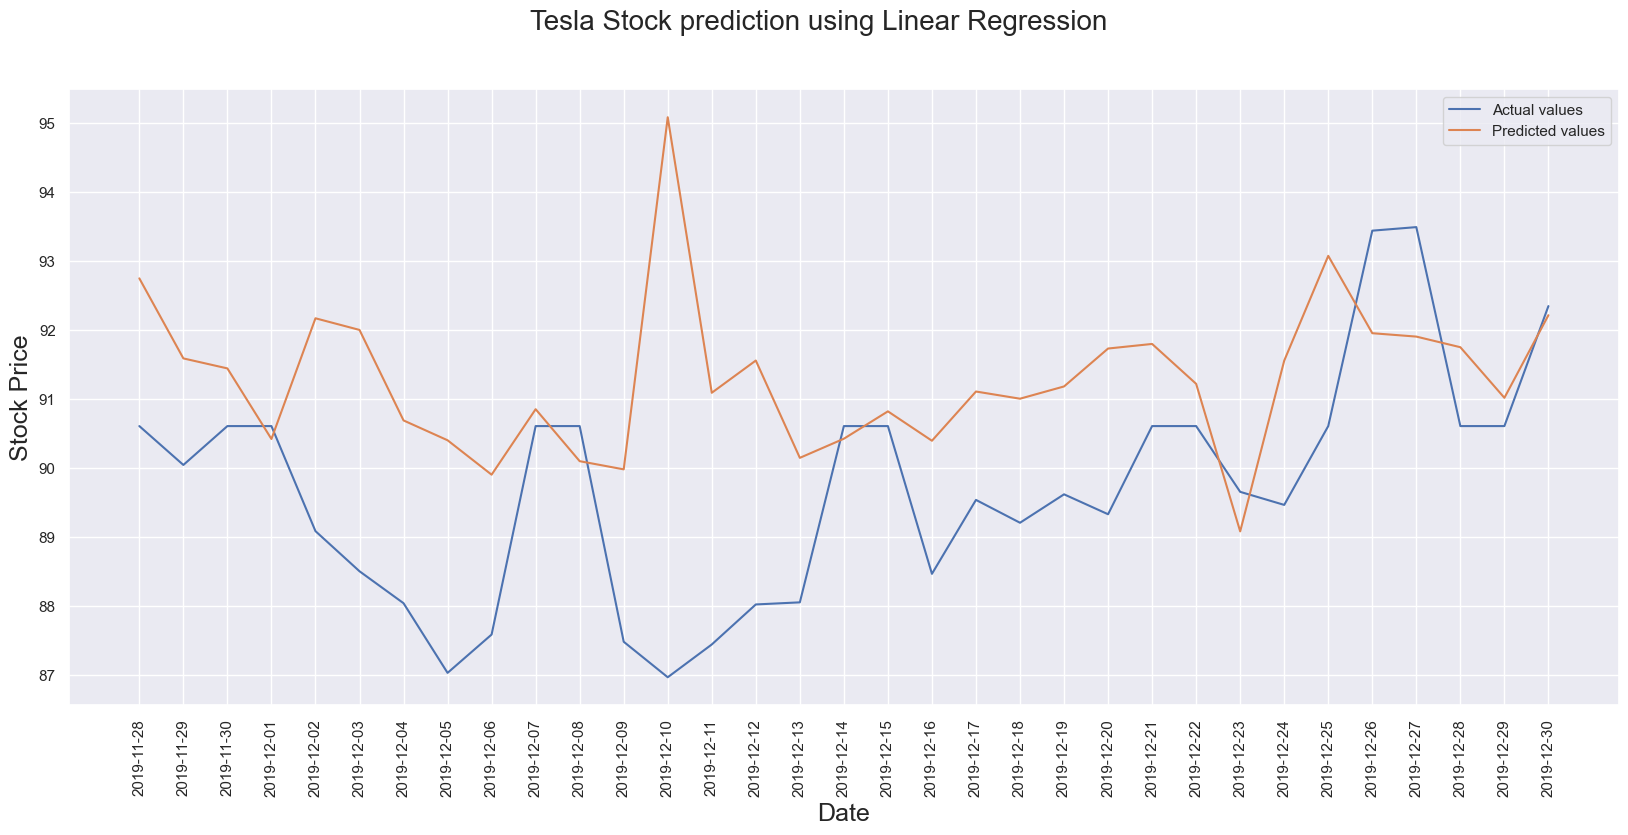

In [14]:
plt.figure(figsize=(20, 8))
plt.plot(tesla['Date'].tail(33), y_test, label = "Actual values")
plt.plot(tesla['Date'].tail(33), predict, label = "Predicted values")
plt.suptitle('Tesla Stock prediction using Linear Regression', fontsize=20)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Stock Price', fontsize=18)
plt.xticks(rotation = 90)
plt.legend()
plt.show()

Using Linear Regression to predict Amazon stock prices

In [15]:
amazon_x = amazon.iloc[:, 1:5].values
amazon_y = amazon.iloc[:, 5].values

x_train, x_test, y_train, y_test = train_test_split(amazon_x, amazon_y, test_size=0.180,  shuffle= False)


scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

model = LinearRegression()
model.fit(x_train, y_train)
predict = model.predict(x_test)

In [16]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))
print(f'Train Score : {model.score(x_train, y_train) * 100:.2f}% and Test Score : {model.score(x_test, y_test) * 100:.2f}% using Linear Regressor.')
errors = abs(predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error: 4.4906
Mean Squared Error: 31.4664
Root Mean Squared Error: 5.6095
(R^2) Score: -1.4363
Train Score : 9.31% and Test Score : -143.63% using Linear Regressor.
Accuracy: 81.96 %.


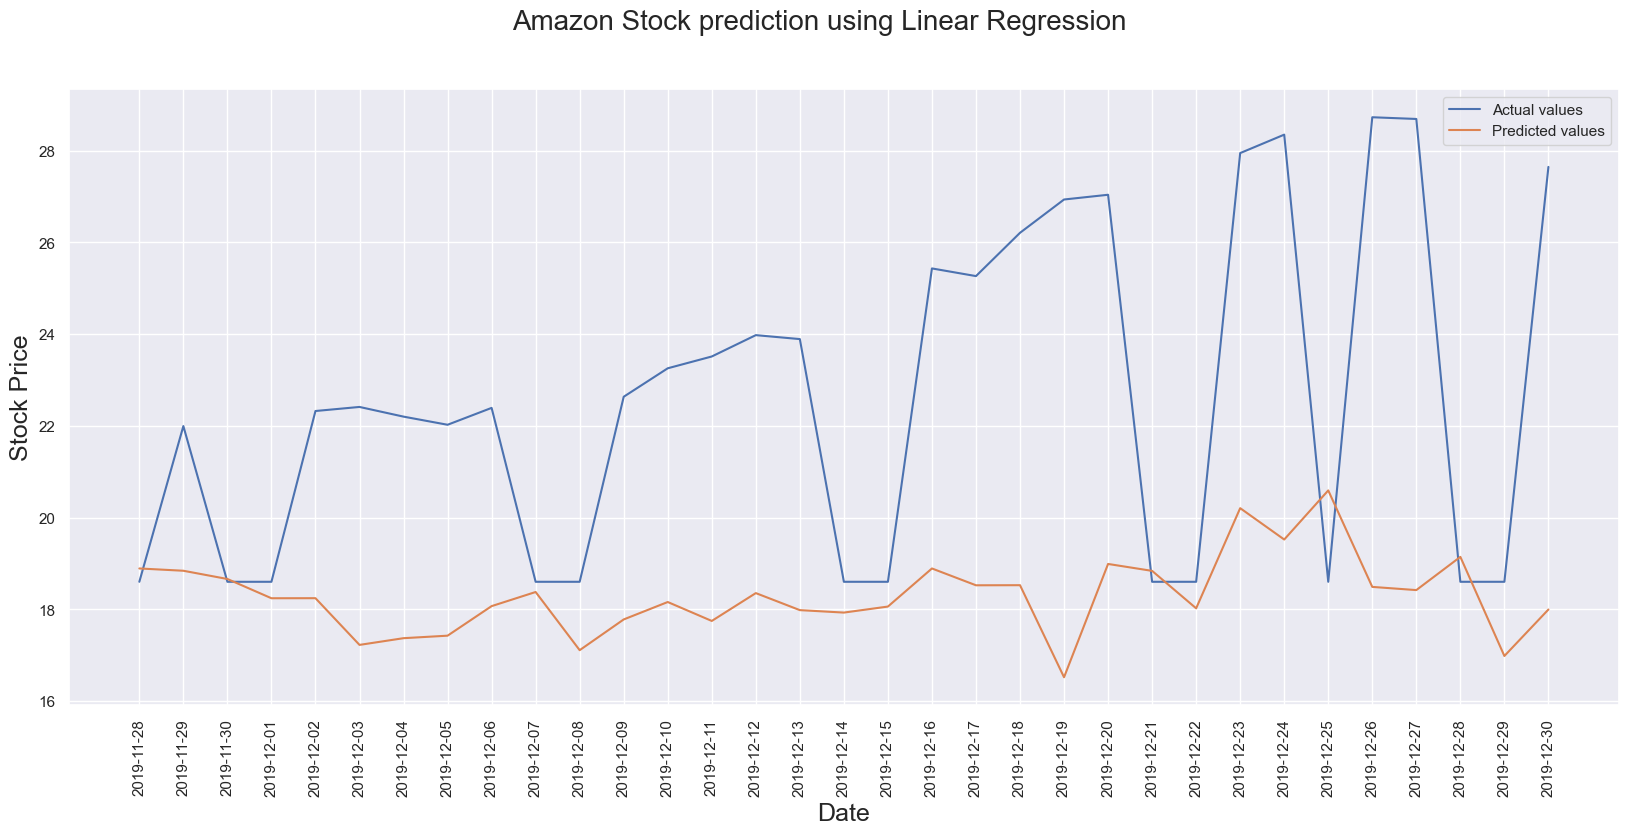

In [18]:
plt.figure(figsize=(20, 8))
plt.plot(tesla['Date'].tail(33), y_test, label = "Actual values")
plt.plot(tesla['Date'].tail(33), predict, label = "Predicted values")
plt.suptitle('Amazon Stock prediction using Linear Regression', fontsize=20)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Stock Price', fontsize=18)
plt.xticks(rotation = 90)
plt.legend()
plt.show()

Using Linear Regression to predict Apple stock prices

In [19]:
apple_x = apple.iloc[:, 1:5].values
apple_y = apple.iloc[:, 5].values

x_train, x_test, y_train, y_test = train_test_split(apple_x, apple_y, test_size=0.180,  shuffle= False)


scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

model = LinearRegression()
model.fit(x_train, y_train)
predict = model.predict(x_test)

In [20]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))
print(f'Train Score : {model.score(x_train, y_train) * 100:.2f}% and Test Score : {model.score(x_test, y_test) * 100:.2f}% using Linear Regressor.')
errors = abs(predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error: 7.8733
Mean Squared Error: 97.3954
Root Mean Squared Error: 9.8689
(R^2) Score: -2.2867
Train Score : 2.80% and Test Score : -228.67% using Linear Regressor.
Accuracy: 88.54 %.


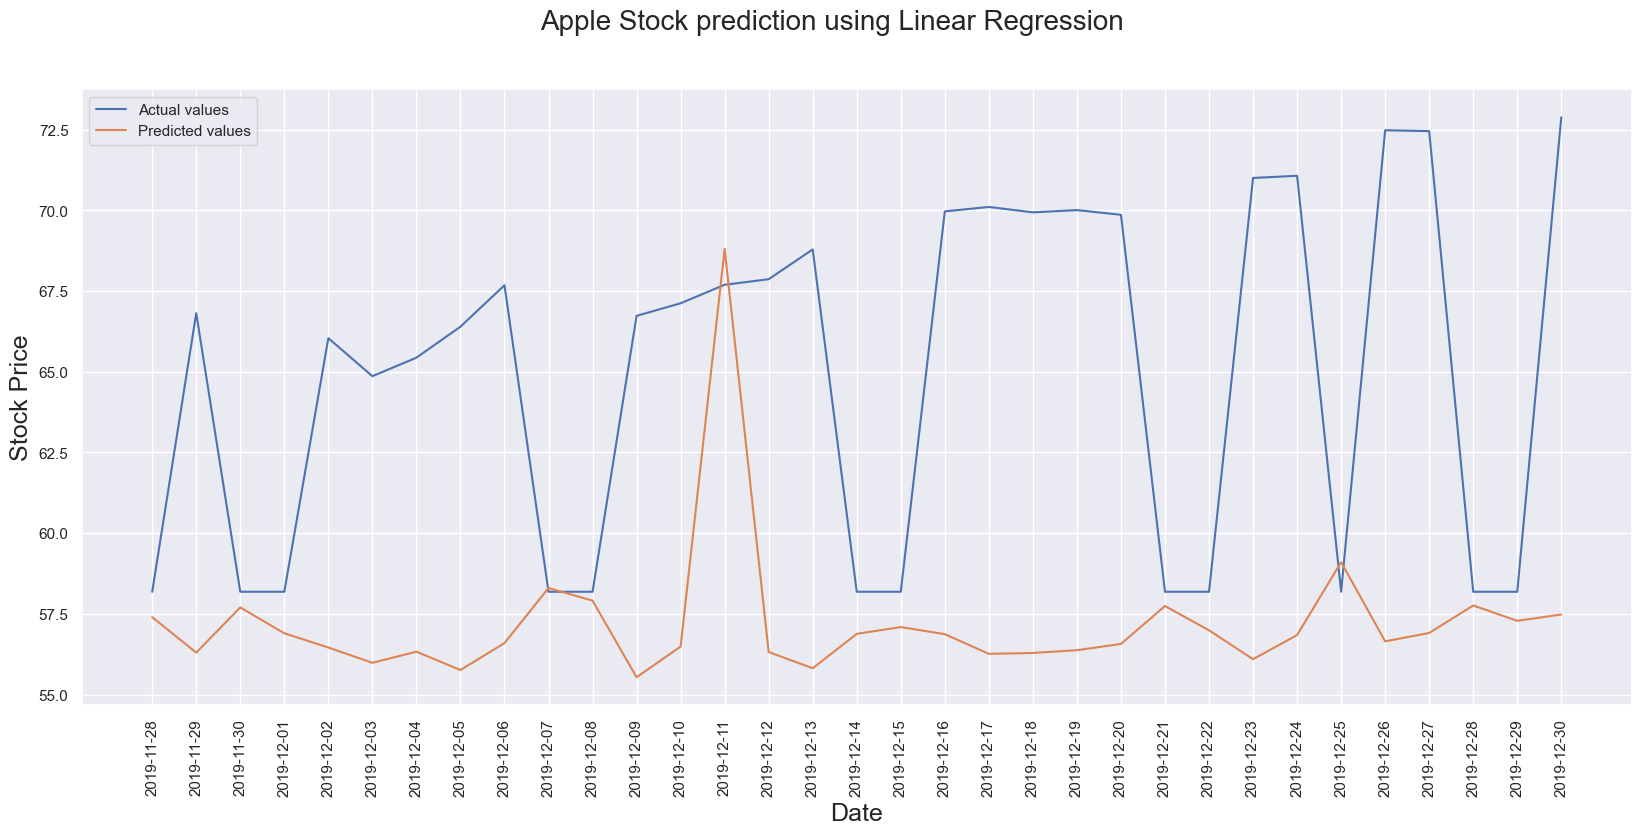

In [21]:
plt.figure(figsize=(20, 8))
plt.plot(tesla['Date'].tail(33), y_test, label = "Actual values")
plt.plot(tesla['Date'].tail(33), predict, label = "Predicted values")
plt.suptitle('Apple Stock prediction using Linear Regression', fontsize=20)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Stock Price', fontsize=18)
plt.xticks(rotation = 90)
plt.legend()
plt.show()

Using Linear Regression to predict Google stock prices

In [22]:
google_x = google.iloc[:, 1:5].values
google_y = google.iloc[:, 5].values

x_train, x_test, y_train, y_test = train_test_split(google_x, google_y, test_size=0.180,  shuffle= False)


scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

model = LinearRegression()
model.fit(x_train, y_train)
predict = model.predict(x_test)

In [23]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))
print(f'Train Score : {model.score(x_train, y_train) * 100:.2f}% and Test Score : {model.score(x_test, y_test) * 100:.2f}% using Linear Regressor.')
errors = abs(predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error: 3.7604
Mean Squared Error: 20.4883
Root Mean Squared Error: 4.5264
(R^2) Score: -2.0197
Train Score : 5.75% and Test Score : -201.97% using Linear Regressor.
Accuracy: 94.37 %.


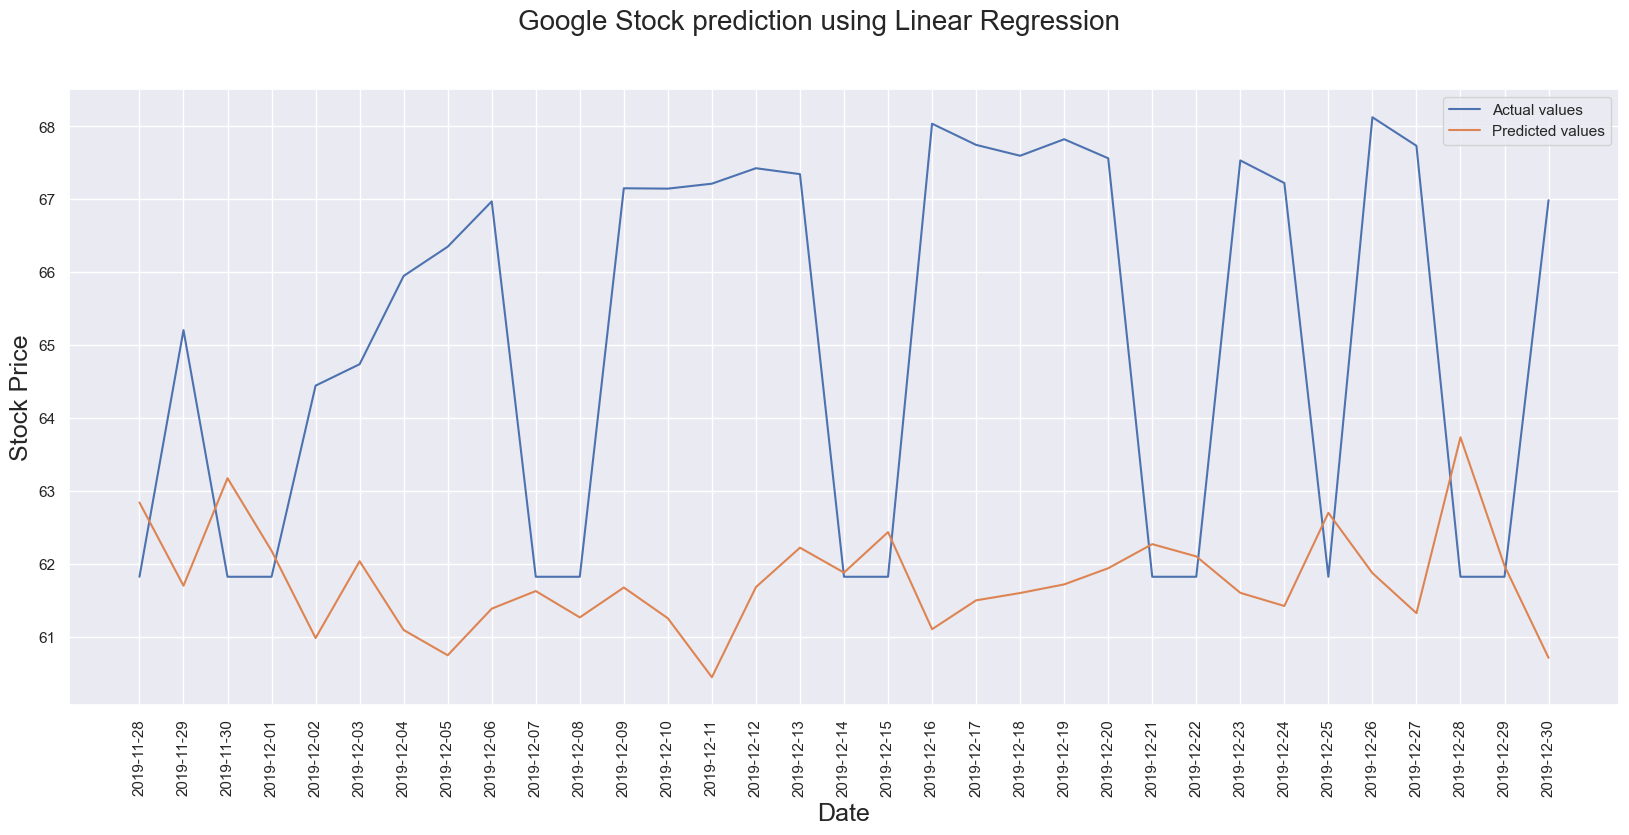

In [25]:
plt.figure(figsize=(20, 8))
plt.plot(tesla['Date'].tail(33), y_test, label = "Actual values")
plt.plot(tesla['Date'].tail(33), predict, label = "Predicted values")
plt.suptitle('Google Stock prediction using Linear Regression', fontsize=20)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Stock Price', fontsize=18)
plt.xticks(rotation = 90)
plt.legend()
plt.show()

Using Linear Regression to predict Microsoft stock prices

In [26]:
microsoft_x = microsoft.iloc[:, 1:5].values
microsoft_y = microsoft.iloc[:, 5].values

x_train, x_test, y_train, y_test = train_test_split(microsoft_x, microsoft_y, test_size=0.180,  shuffle= False)


scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

model = LinearRegression()
model.fit(x_train, y_train)
predict = model.predict(x_test)

In [27]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))
print(f'Train Score : {model.score(x_train, y_train) * 100:.2f}% and Test Score : {model.score(x_test, y_test) * 100:.2f}% using Linear Regressor.')
errors = abs(predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error: 9.2388
Mean Squared Error: 127.9554
Root Mean Squared Error: 11.3117
(R^2) Score: -2.3245
Train Score : 5.27% and Test Score : -232.45% using Linear Regressor.
Accuracy: 93.99 %.


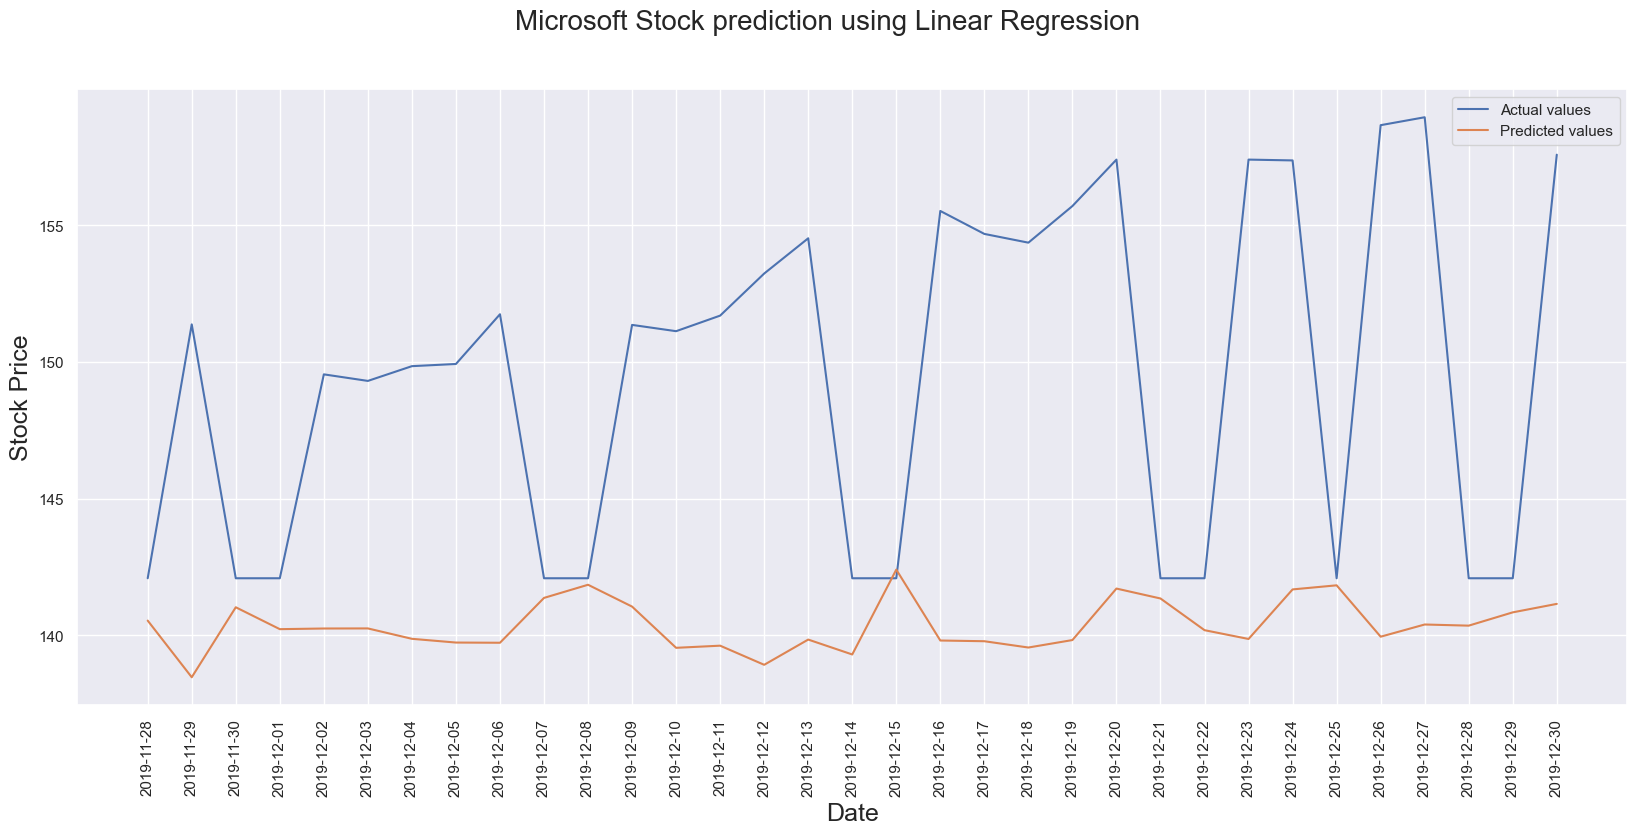

In [28]:
plt.figure(figsize=(20, 8))
plt.plot(tesla['Date'].tail(33), y_test, label = "Actual values")
plt.plot(tesla['Date'].tail(33), predict, label = "Predicted values")
plt.suptitle('Microsoft Stock prediction using Linear Regression', fontsize=20)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Stock Price', fontsize=18)
plt.xticks(rotation = 90)
plt.legend()
plt.show()